## Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [4]:
gold_df = pd.read_csv('gld_price_data.csv')
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_df.shape

(2290, 6)

In [6]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation of the data

In [8]:
gold_df.corr(numeric_only=True)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

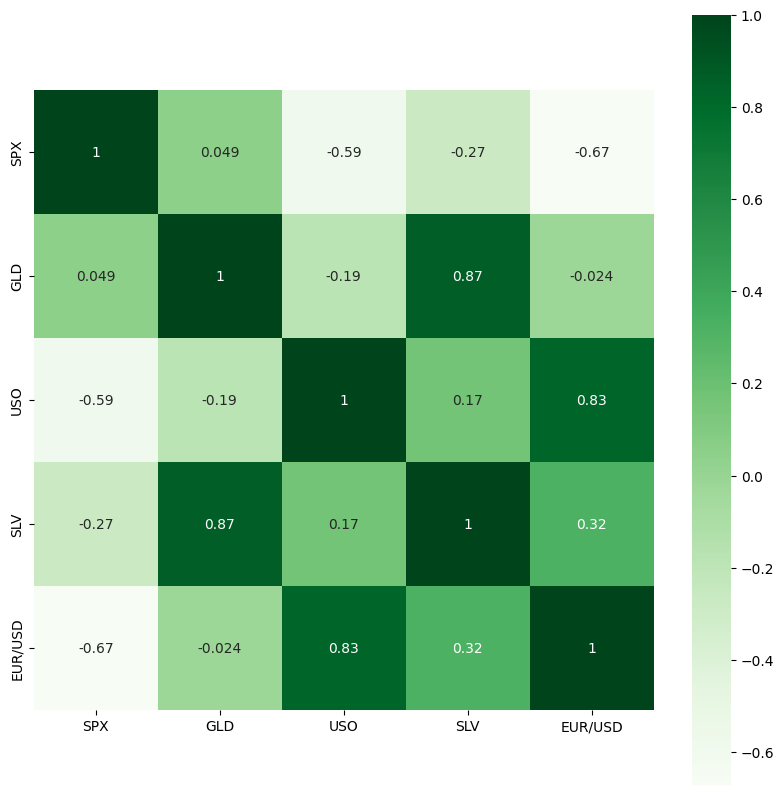

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(gold_df.corr(numeric_only=True), annot=True, cmap="Greens", square=True)

In [13]:
gold_df.corr(numeric_only=True)['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Density'>

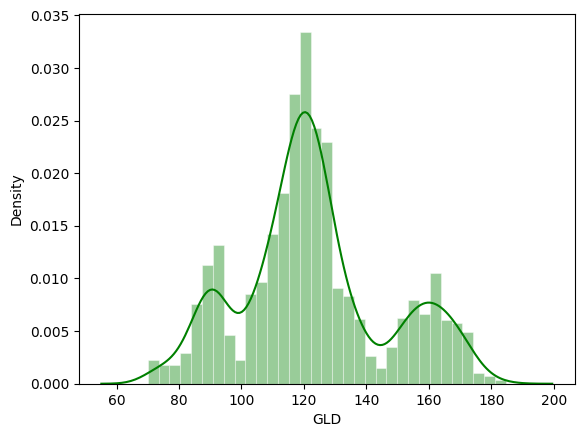

In [39]:
sns.histplot(gold_df['GLD'], color='green', kde=True, stat="density", alpha=0.4, edgecolor=(1,1,1,.4), kde_kws=dict(cut=3))

### Splitting of Data

In [52]:
X = gold_df.drop(['Date', 'GLD'], axis=1)
y= gold_df['GLD']

X,y

(              SPX        USO      SLV   EUR/USD
 0     1447.160034  78.470001  15.1800  1.471692
 1     1447.160034  78.370003  15.2850  1.474491
 2     1411.630005  77.309998  15.1670  1.475492
 3     1416.180054  75.500000  15.0530  1.468299
 4     1390.189941  76.059998  15.5900  1.557099
 ...           ...        ...      ...       ...
 2285  2671.919922  14.060000  15.5100  1.186789
 2286  2697.790039  14.370000  15.5300  1.184722
 2287  2723.070068  14.410000  15.7400  1.191753
 2288  2730.129883  14.380000  15.5600  1.193118
 2289  2725.780029  14.405800  15.4542  1.182033
 
 [2290 rows x 4 columns],
 0        84.860001
 1        85.570000
 2        85.129997
 3        84.769997
 4        86.779999
            ...    
 2285    124.589996
 2286    124.330002
 2287    125.180000
 2288    124.489998
 2289    122.543800
 Name: GLD, Length: 2290, dtype: float64)

In [54]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

## Model Decalaration and Fitting

In [55]:
forestreg = RandomForestRegressor() 

pipe = make_pipeline(StandardScaler(), forestreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [56]:
from sklearn import metrics

y_ = pipe.predict(X_test)

### Accuracy Testing

In [57]:
metrics.r2_score(y_test, y_)

0.9900043334791848

In [58]:
metrics.mean_squared_error(y_test, y_)

5.333830053610168

#### Comparing actual values and predicated values 

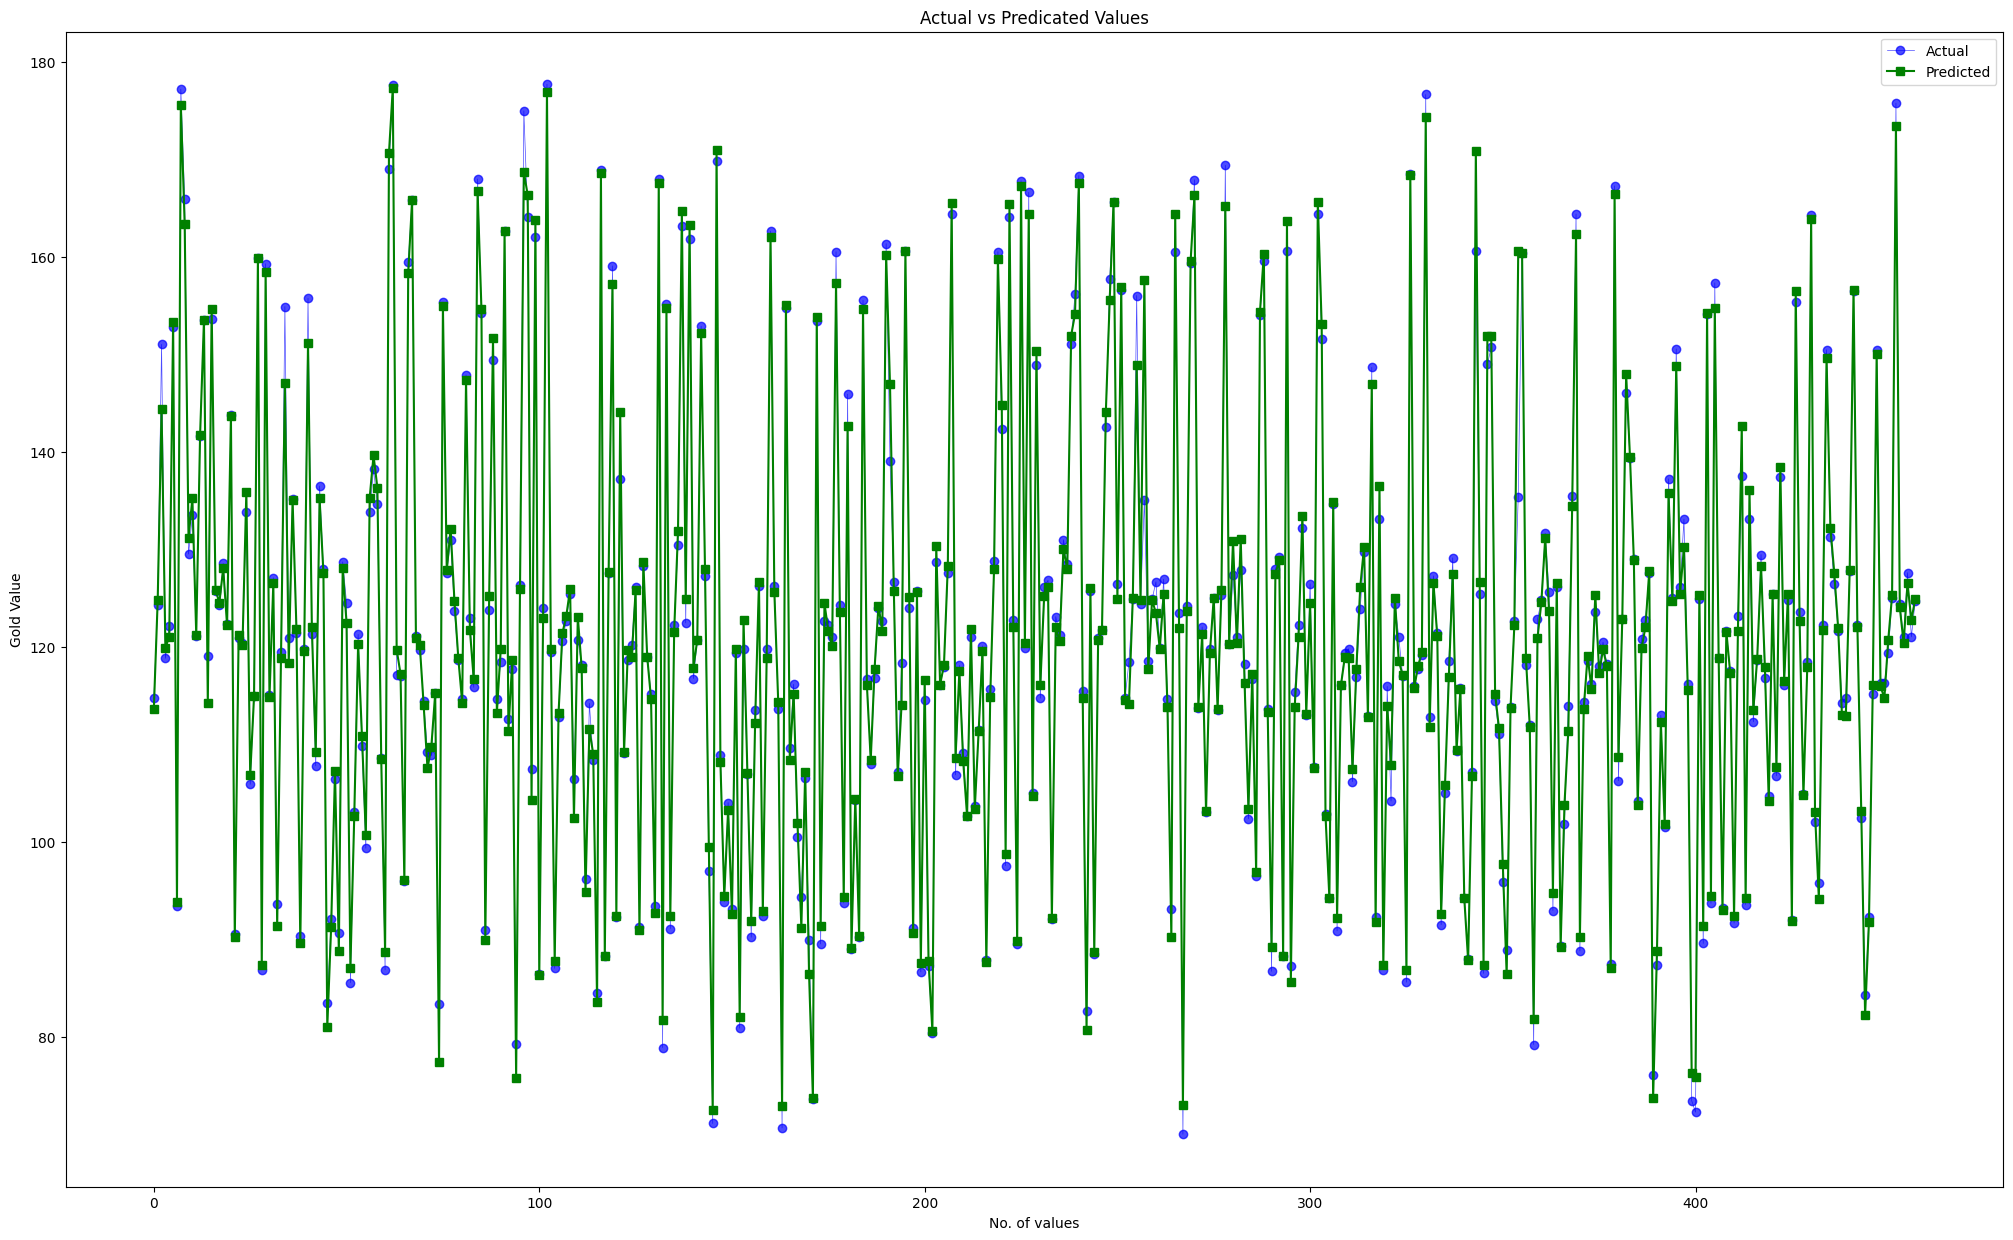

In [77]:
y_test_l = list(y_test)
y_l = list(y_)

plt.figure(figsize=(25,15))
plt.plot(y_test_l, color='blue', label="Actual", marker="o", linewidth=0.5, alpha=0.7)
plt.plot(y_l, color='green', label="Predicted",marker="s")
plt.title("Actual vs Predicated Values")
plt.xlabel("No. of values")
plt.ylabel("Gold Value")
plt.legend(loc='best')

## Learning Curve

In [80]:
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1.0,10))

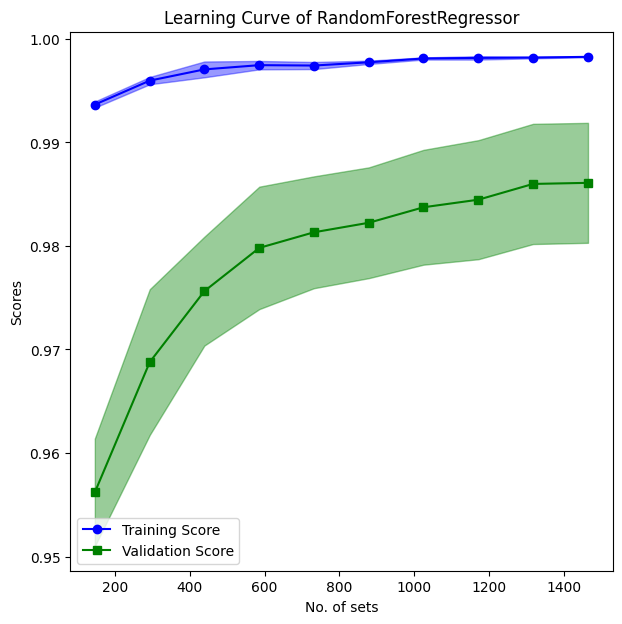

In [84]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(7,7))
plt.plot(train_sizes, train_scores_mean, color='blue', label='Training Score', marker='o')
plt.plot(train_sizes, val_scores_mean, color='green', label='Validation Score', marker='s')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.4)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.4)

plt.xlabel("No. of sets")
plt.ylabel("Scores")
plt.title("Learning Curve of RandomForestRegressor")
plt.legend(loc='best')

In [82]:
print(train_scores)
print(val_scores)

[[0.99347157 0.99335048 0.99390436 0.99343892 0.99410346]
 [0.99533763 0.99597629 0.99638384 0.99594352 0.99620478]
 [0.99554574 0.99728118 0.99729413 0.9975793  0.99755842]
 [0.99670792 0.99779878 0.99779882 0.99760158 0.99740233]
 [0.997143   0.99807521 0.99738069 0.99713963 0.99738519]
 [0.99775702 0.99803997 0.99764308 0.99758249 0.99766893]
 [0.99796646 0.9982614  0.99804765 0.99818636 0.99807136]
 [0.99807373 0.99843917 0.99799597 0.99824894 0.99805423]
 [0.99816777 0.99821243 0.99811431 0.99815729 0.99833229]
 [0.99829104 0.99828591 0.99820124 0.99824205 0.99830474]]
[[0.95834288 0.95526621 0.96479768 0.95322449 0.94935169]
 [0.97200562 0.96897601 0.98011919 0.96142942 0.96139811]
 [0.97771504 0.97983766 0.98182828 0.9694696  0.96932107]
 [0.98249367 0.98141071 0.98784036 0.97719091 0.97012824]
 [0.98544013 0.98409502 0.98723846 0.97632512 0.97349477]
 [0.98425013 0.9852718  0.98839507 0.98047002 0.97281547]
 [0.98722448 0.98510498 0.98995512 0.98264551 0.97374362]
 [0.98950563 